<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/Ensemble/Boosting/AdaBoost/AdaboostDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df["x1"] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df["x2"] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df["label"] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


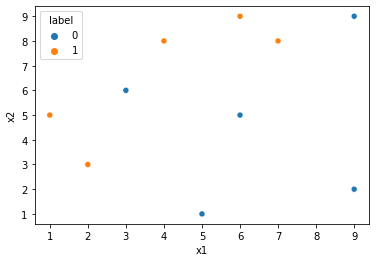

In [5]:
import seaborn as sns
sns.scatterplot(x=df.x1, y=df.x2, hue=df.label)

In [6]:
df["weights"] = 1/df.shape[0]

In [7]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -2].values

In [11]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

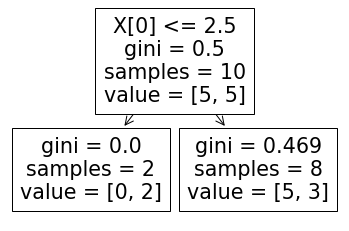

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


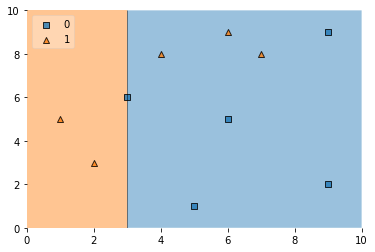

In [13]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [14]:
df["y_pred"] = dt1.predict(X)

In [15]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):
  return 0.5*np.log((1 - error)/(error))

# Important

### Sometimes you may get error = 0, when your model is 100% accurate and all points are classified correctly.

### In that case, above formula:

## $$0.5 × log(\frac{1 - error}{error})$$

### will give problems.

## To solve it, we can add a small value in denominator, so that it never becomes zero.

## like:

$$0.5 × log(\frac{1 - error}{error + 0.00001})$$

In [17]:
# step 3- calculate model weight

err = df[df.label != df.y_pred].weights.values.sum()
print(err)

alpha1 = calculate_model_weight(err)
print(alpha1)

0.30000000000000004
0.4236489301936017


In [18]:
np.round(alpha1, 4)

0.4236

In [19]:
# step 4 - Update weights

def update_row_weights(row, alpha = np.round(alpha1, 4)):
  if row.label == row.y_pred :
    return row.weights * np.exp(-alpha)
  else:
    return row.weights * np.exp(alpha)

In [20]:
df["updated_weights"] = df.apply(update_row_weights, axis=1)

In [21]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065469
1,2,3,1,0.1,1,0.065469
2,3,6,0,0.1,0,0.065469
3,4,8,1,0.1,0,0.152745
4,5,1,0,0.1,0,0.065469
5,6,9,1,0.1,0,0.152745
6,6,5,0,0.1,0,0.065469
7,7,8,1,0.1,0,0.152745
8,9,9,0,0.1,0,0.065469
9,9,2,0,0.1,0,0.065469


## Why $$ new_(weight) = old_(weight) \times \:exp^{-α}$$

In [22]:
a = np.linspace(-5, 5)
a 

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

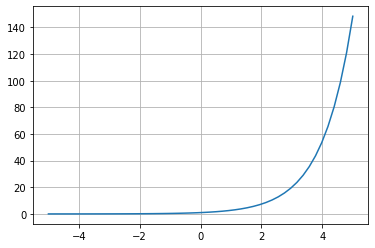

In [23]:
import matplotlib.pyplot as plt
sns.lineplot(x = a, y = np.apply_along_axis(lambda x : np.exp(x), 0, a))
plt.grid()
plt.show()

We notice in this graph that vlaue of y increase drastically when x increases slightly, expecially when x>0. And y is small when x is small.

In our case, x is alpha. So when a model is very accurate, its alpha will be more, and hence exp<sup>α</sup> will also be more, and new_weight will also be high.

<br>

Meaning if we have a trust wortht model, it will significantly increase weight of incorrectly classified rows.

If model is less accurate, then alpha will be low, exp<sup>α</sup> will also be low, and increase in weight of incorrectly classified points will be low.

### Similar logic can be applied for correctly classified points.
### but in this case, smaller the alpha, greater is 
# exp<sup>-α</sup>

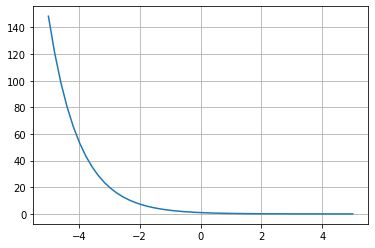

In [24]:
sns.lineplot(x = a, y = np.apply_along_axis(lambda x : np.exp(-x), 0, a))
plt.grid()
plt.show()

In [25]:
df.updated_weights.sum()

0.9165151400883117

In [26]:
df["normalized_weights"] = df.updated_weights / df.updated_weights.sum()

In [27]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065469,0.071432
1,2,3,1,0.1,1,0.065469,0.071432
2,3,6,0,0.1,0,0.065469,0.071432
3,4,8,1,0.1,0,0.152745,0.166659
4,5,1,0,0.1,0,0.065469,0.071432
5,6,9,1,0.1,0,0.152745,0.166659
6,6,5,0,0.1,0,0.065469,0.071432
7,7,8,1,0.1,0,0.152745,0.166659
8,9,9,0,0.1,0,0.065469,0.071432
9,9,2,0,0.1,0,0.065469,0.071432


In [28]:
df.normalized_weights.sum()

1.0

In [29]:
df["cumsum_upper"] = np.cumsum(df.normalized_weights)

In [30]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065469,0.071432,0.071432
1,2,3,1,0.1,1,0.065469,0.071432,0.142864
2,3,6,0,0.1,0,0.065469,0.071432,0.214296
3,4,8,1,0.1,0,0.152745,0.166659,0.380955
4,5,1,0,0.1,0,0.065469,0.071432,0.452387
5,6,9,1,0.1,0,0.152745,0.166659,0.619045
6,6,5,0,0.1,0,0.065469,0.071432,0.690477
7,7,8,1,0.1,0,0.152745,0.166659,0.857136
8,9,9,0,0.1,0,0.065469,0.071432,0.928568
9,9,2,0,0.1,0,0.065469,0.071432,1.000000


In [31]:
df["cumsum_lower"] = df.cumsum_upper - df.normalized_weights

In [32]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065469,0.071432,0.071432,0.000000
1,2,3,1,0.1,1,0.065469,0.071432,0.142864,0.071432
2,3,6,0,0.1,0,0.065469,0.071432,0.214296,0.142864
3,4,8,1,0.1,0,0.152745,0.166659,0.380955,0.214296
4,5,1,0,0.1,0,0.065469,0.071432,0.452387,0.380955
5,6,9,1,0.1,0,0.152745,0.166659,0.619045,0.452387
6,6,5,0,0.1,0,0.065469,0.071432,0.690477,0.619045
7,7,8,1,0.1,0,0.152745,0.166659,0.857136,0.690477
8,9,9,0,0.1,0,0.065469,0.071432,0.928568,0.857136
9,9,2,0,0.1,0,0.065469,0.071432,1.000000,0.928568


In [33]:
df = df[["x1", "x2", "label", "weights", "y_pred", "updated_weights", "cumsum_lower", "cumsum_upper"]]

In [34]:
df

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065469,0.000000,0.071432
1,2,3,1,0.1,1,0.065469,0.071432,0.142864
2,3,6,0,0.1,0,0.065469,0.142864,0.214296
3,4,8,1,0.1,0,0.152745,0.214296,0.380955
4,5,1,0,0.1,0,0.065469,0.380955,0.452387
5,6,9,1,0.1,0,0.152745,0.452387,0.619045
6,6,5,0,0.1,0,0.065469,0.619045,0.690477
7,7,8,1,0.1,0,0.152745,0.690477,0.857136
8,9,9,0,0.1,0,0.065469,0.857136,0.928568
9,9,2,0,0.1,0,0.065469,0.928568,1.000000


# Generating random numbers for next dataset creation

In [38]:
from numpy.core.arrayprint import format_float_scientific
def create_new_dataset(df):
  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
      if row.cumsum_upper > a and row.cumsum_lower < a:
        ind = np.where(df.cumsum_lower == row.cumsum_lower)[0][0]
        indices.append(ind)
  return indices

In [38]:
# create_new_dataset returns positional index of rows and not their specified index.

### Rows in new dataset

In [39]:
index_values = create_new_dataset(df)
index_values
# These are positional index. Meaning in [5, 2, 7, 0, 7, 4, 7, 7, 2, 3]
# first element 5 is row at postion 5(starting counting from 0) and not a row 
# whose specified index is 5. For dataset 1, they both happen to be same,
# but below as we create new datasets below, rows will be shuffled.
# Then 5 won't mean index 5, but row at position 5 if start counting it from above.

[5, 2, 7, 0, 7, 4, 7, 7, 2, 3]

### Rows of samples which were misclassified

In [40]:
df[df.label != df.y_pred].index

# although, here 3 means index 3 and not position 3.

Int64Index([3, 5, 7], dtype='int64')

In [41]:
# You can see two columns up that indeces of new dataset have most rows 
# which were misclassified. E.g. 5, 3..

In [42]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]

In [43]:
second_df

,x1,x2,label,weights
5,6,9,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1


In [44]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [45]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

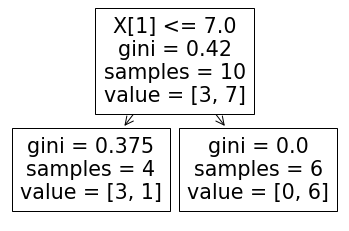

In [46]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


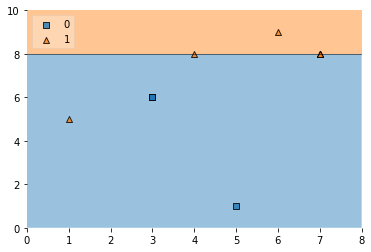

In [47]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [48]:
second_df['y_pred'] = dt2.predict(X)
second_df

,x1,x2,label,weights,y_pred
5,6,9,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
0,1,5,1,0.1,0
7,7,8,1,0.1,1
4,5,1,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1


In [49]:
# step 3- calculate model weight

err = second_df[second_df.label != second_df.y_pred].weights.values.sum()
print(err)

alpha2 = calculate_model_weight(err)
print(alpha2)

0.1
1.0986122886681098


In [50]:
np.round(alpha2, 4)

1.0986

In [51]:
# Step 4 - Update weights
def update_row_weights(row,alpha=np.round(alpha2, 4)):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,x1,x2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033334
2,3,6,0,0.1,0,0.033334
7,7,8,1,0.1,1,0.033334
0,1,5,1,0.1,0,0.299996
7,7,8,1,0.1,1,0.033334
4,5,1,0,0.1,0,0.033334
7,7,8,1,0.1,1,0.033334
7,7,8,1,0.1,1,0.033334
2,3,6,0,0.1,0,0.033334
3,4,8,1,0.1,1,0.033334


In [52]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
5,6,9,1,0.1,1,0.033334,0.055556
2,3,6,0,0.1,0,0.033334,0.055556
7,7,8,1,0.1,1,0.033334,0.055556
0,1,5,1,0.1,0,0.299996,0.499994
7,7,8,1,0.1,1,0.033334,0.055556
4,5,1,0,0.1,0,0.033334,0.055556
7,7,8,1,0.1,1,0.033334,0.055556
7,7,8,1,0.1,1,0.033334,0.055556
2,3,6,0,0.1,0,0.033334,0.055556
3,4,8,1,0.1,1,0.033334,0.055556


In [53]:
second_df['nomalized_weights'].sum()

1.0

In [54]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df = second_df[['x1','x2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


In [55]:
second_df

,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.055556,0.000000,0.055556
2,3,6,0,0.1,0,0.055556,0.055556,0.111112
7,7,8,1,0.1,1,0.055556,0.111112,0.166669
0,1,5,1,0.1,0,0.499994,0.166669,0.666663
7,7,8,1,0.1,1,0.055556,0.666663,0.722219
4,5,1,0,0.1,0,0.055556,0.722219,0.777775
7,7,8,1,0.1,1,0.055556,0.777775,0.833331
7,7,8,1,0.1,1,0.055556,0.833331,0.888888
2,3,6,0,0.1,0,0.055556,0.888888,0.944444
3,4,8,1,0.1,1,0.055556,0.944444,1.000000


In [79]:
# second_df index
second_df.index

Int64Index([5, 2, 7, 0, 7, 4, 7, 7, 2, 3], dtype='int64')

In [81]:
# random index from second_df by create model function
index_values = create_new_dataset(second_df)
index_values

[3, 3, 3, 5, 3, 8, 2, 5, 1, 3]

In [82]:
# equivalent index in second df
second_df.iloc[index_values].index

Int64Index([0, 0, 0, 4, 0, 2, 7, 4, 2, 0], dtype='int64')

In [83]:
second_df[second_df.label != second_df.y_pred].index

Int64Index([0], dtype='int64')

In [84]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,x1,x2,label,weights
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
4,5,1,0,0.1
0,1,5,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1


In [85]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


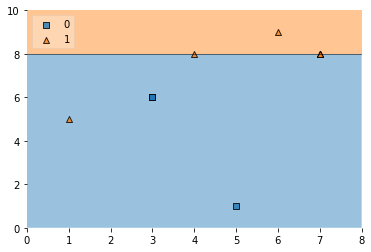

In [86]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [87]:
third_df['y_pred'] = dt3.predict(X)
third_df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1
4,5,1,0,0.1,0
0,1,5,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
4,5,1,0,0.1,1
2,3,6,0,0.1,0
0,1,5,1,0.1,1


In [88]:
err = third_df[third_df.label != third_df.y_pred].weights.values.sum()
print(err)

alpha3 = calculate_model_weight(err)
print(alpha3)

0.2
0.6931471805599453


In [89]:
print(alpha1, alpha2, alpha3)

0.4236489301936017 1.0986122886681098 0.6931471805599453


# Prediction

In [113]:
query = np.array([1,5]).reshape(1,2)
yp1 = 1 if dt1.predict(query)[0] else -1

In [114]:
yp2 = 1 if dt2.predict(query)[0] else -1

In [115]:
yp3 = 1 if dt3.predict(query)[0] else -1

In [116]:
yp1, yp2, yp3

(1, -1, -1)

In [120]:
no = alpha1 * yp1 + alpha2 * (yp2) + alpha3 * (yp3)

In [121]:
no

-1.3681105390344532

In [123]:
1 if np.sign(no) != -1 else 0

0

In [135]:
def get_prediction(i):
  for li in i:
    query = np.array(li).reshape(1,2)
    yp1 = 1 if dt1.predict(query) else -1
    yp2 = 1 if dt2.predict(query) else -1
    yp3 = 1 if dt3.predict(query) else -1
    no = alpha1 * yp1 + alpha2 * yp2 + alpha3 * yp3
    print(f"{1 if np.sign(no) != -1 else 0}")

In [136]:
get_prediction([[3, 6]])

0


In [137]:
df[["x1", "x2"]].values

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [138]:
get_prediction(df[["x1", "x2"]].values)

0
0
0
1
0
1
0
1
1
0


In [139]:
df.label

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64